In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [6]:
# depricated
# transform = transforms.v2.toTensor()

## Transfrom PIL image to tensor

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

## Download train and test dataset

In [11]:
train_dataset = datasets.MNIST(
    root = './data',
    train = True,
    download = True,
    transform = transform,
)
test_dataset = datasets.MNIST(
    root = './data',
    train = False,
    download = True,
    transform = transform,
)

In [12]:
len(train_dataset), len(test_dataset)

(60000, 10000)

## Plot random images from train dataset

Text(0.5, 1.0, 'Label: 8')

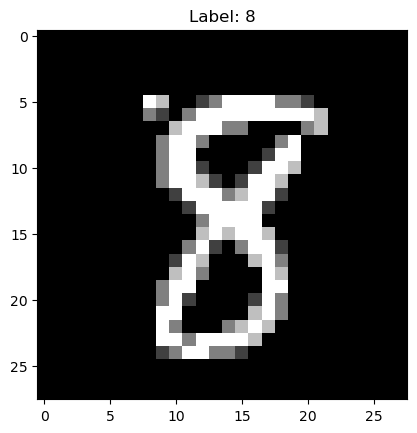

In [17]:
import matplotlib.pyplot as plt
import random

image, label = train_dataset[random.randint(0, len(train_dataset) - 1)]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {label}')

In [18]:
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
)

test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False, 
)

In [29]:
class DigitClassifer(nn.Module):
    def __init__(self):
        super(DigitClassifer, self).__init__()
        self.fc1 = nn.Linear(28*28, 128) # Input layer to hidden layer
        self.fc2 = nn.Linear(128, 10) # Hidden layer to 10 output classes
        self.relu = nn.functional.relu # Activation function

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [36]:
model = DigitClassifer()
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer

## Training Loop

In [37]:
e = []
l = []
for epoch in range(10):
    for images, labels in train_loader:
        X, y = images, labels

        y_pred = model(X) # predict : Forward pass
        loss = criterion(y_pred, y) # calculate loss
        optimizer.zero_grad() # clear previous gradients
        loss.backward() # backpropagation: compute gradients
        optimizer.step() # update weights using gradients

    e.append(epoch)
    l.append(loss.item())
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
       

Epoch 1, Loss: 0.2403
Epoch 2, Loss: 0.0223
Epoch 3, Loss: 0.0941
Epoch 4, Loss: 0.1273
Epoch 5, Loss: 0.0256
Epoch 6, Loss: 0.0208
Epoch 7, Loss: 0.0434
Epoch 8, Loss: 0.0025
Epoch 9, Loss: 0.0345
Epoch 10, Loss: 0.0014


<Axes: >

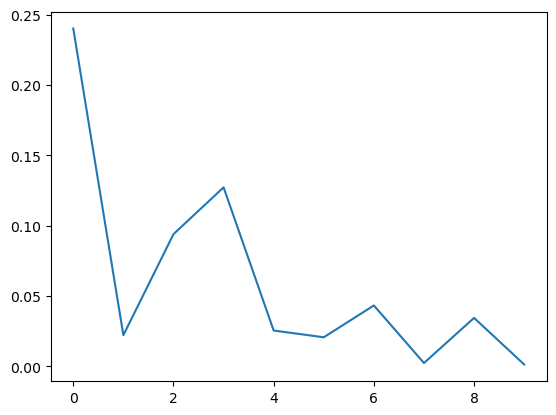

In [38]:
import seaborn as sns

sns.lineplot(x=e, y=l)

Evaluate Model Accuracy on Test Data

In [40]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        X, y = images, labels
        y_pred = model(X)
        
        _, predicted = torch.max(y_pred.data, 1)  # Get the index of the max log-probability
        
        total += y.size(0)
        correct += (predicted == y).sum().item()

    print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 97.95%
